#Iris Classifing Exercise

![alt text](https://www.plant-world-seeds.com/images/item_images/000/007/023/large_square/iris_baby_blue.jpg?1500653527)

Import pandas for dataset operations,  seaborn for visualization and sklearn for learning.

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

#Possible Clasifiers from  https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

##Load Dataset
Set species column as category (to do scatterplot with pandas)

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv", delimiter=',')
df['species']=df['species'].astype('category')

##Give a look to the data

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


View data statistics of data as a whole

In [18]:
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


##Split data in train and test set.

In [0]:
train, test = train_test_split(df, test_size=0.2)

**from train_test_split doc**: "Split arrays or matrices into random train and test subsets.
                            Quick utility that wraps input validation and next(ShuffleSplit().split(X, y))"

##Analize train data set

In [6]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
128,6.4,2.8,5.6,2.1,virginica
40,5.0,3.5,1.3,0.3,setosa
23,5.1,3.3,1.7,0.5,setosa
26,5.0,3.4,1.6,0.4,setosa
36,5.5,3.5,1.3,0.2,setosa


For example take a look at the data by doing scatter plots of all pairs of variables
--This plot with pandas is not as beautiful and clear as de next--

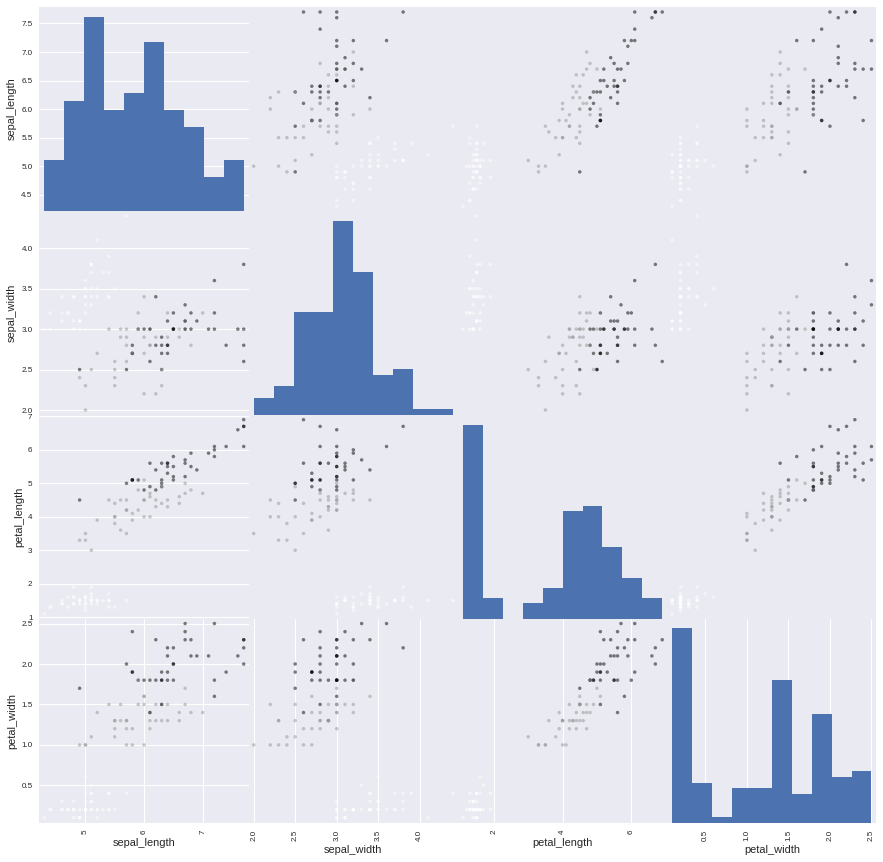

In [7]:
ax=pd.plotting.scatter_matrix(train,figsize=(15, 15),c=list(train['species'].cat.codes))

Creating a scatter plot with seaborn

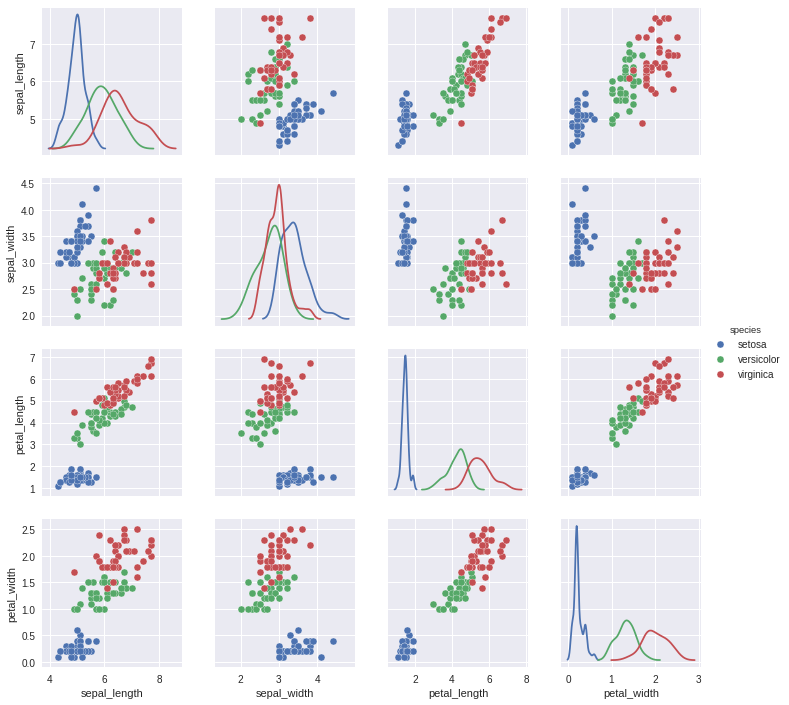

In [8]:
sns.pairplot(train, hue="species",diag_kind="kde")

** So what features are more useful to separate classes? **

##After "understanding" the data start with the training

Split Features and Labels

In [0]:
x=train.drop('species',axis=1)
y=train['species']

Choose a fitting algorithm, chose the parameters for the algorithm and train!

In [10]:
kneigh = KNeighborsClassifier(n_neighbors=5)
kneigh.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

###Now, did it result in something useful?

In [11]:
kneigh.score(x,y)

0.9666666666666667

In [12]:
predicted=kneigh.predict(x)
confusion_matrix(y,predicted)

array([[42,  0,  0],
       [ 0, 36,  3],
       [ 0,  1, 38]])

** Whats the F1 Score? **



** How was kneigh.score calculated? **





## Check generalization (Test set)

In [0]:
xt=test.drop('species',axis=1)
yt=test['species']

In [14]:
kneigh.score(xt,yt)

0.9666666666666667

In some cases the question whether the test set is complete arises:

In [0]:
train.describe(include='all')

In [0]:
test.describe(include='all')

In [0]:
train.boxplot()

In [0]:
test.boxplot()

## More Questions:

* What number of neighbors generalizes best?
* What classifier works best for this data set? 
* Is the training time different among clasifiers?
* Can we add or remove features to improve accuracy or training time?

For Classifier Comparison look at:
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html